# Breast Cancer Wisconsin (Diagnostic) Data Set

In [1]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import GridSearchCV #for tuning parameter
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics # for the check the error and accuracy of the model

In [2]:
#reading column names
names = pd.read_fwf('../data/wdbc.names')
names

,1. Title: Wisconsin Diagnostic Breast Cancer (WDBC)
0,2. Source Information
1,a) Creators:
2,"Dr. William H. Wolberg, General Surgery Dept.,..."
3,"Wisconsin, Clinical Sciences Center, Madison,..."
4,wolberg@eagle.surgery.wisc.edu
...,...
96,"resulting in 30 features. For instance, field..."
97,"13 is Radius SE, field 23 is Worst Radius."
98,All feature values are recoded with four signi...
99,8. Missing attribute values: none


As we can see that the column names are missing above so we'll insert it manually

In [3]:
cols = """id,
diagnosis,
radius_mean,
texture_mean,
perimeter_mean,
area_mean,
smoothness_mean,
compactness_mean,
concavity_mean,
concave_points_mean,
symmetry_mean,
fractal_dimension_mean,
radius_se,
texture_se,
perimeter_se,
area_se,
smoothness_se,
compactness_se,
concavity_se,
concave_points_se,
symmetry_se,
fractal_dimension_se,
radius_worst,
texture_worst,
perimeter_worst,
area_worst,
smoothness_worst,
compactness_worst,
concavity_worst,
concave_points_worst,
symmetry_worst,
fractal_dimension_worst"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

In [4]:
columns

['id',
 'diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave_points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave_points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave_points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [5]:
#reading data
path = '../data/wdbc.data'
df = pd.read_csv(path, names=columns)

In [6]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave_points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [8]:
#As we do not need the id coloumn for our analysis
df.drop("id",axis=1,inplace=True)
#Converting diagnosis into numeric
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})

In [9]:
#Calculating features
features = df.drop('diagnosis', axis=1)

In [10]:
#Calculating target
target = df['diagnosis']

# Forward Stepwise feauture selection

Let's find the best 10 features and perform classification based on that. 

In [11]:
columns = list(features.columns)
selected_features = []
scores = []
N = 10
while len(selected_features) < N:
    best_score = pd.Series([0])
    best_feature = None
    for feature in columns:
        score = cross_val_score(DecisionTreeClassifier(max_depth=10),
                               pd.get_dummies(features[selected_features + [feature]]), target)
        if score.mean() > best_score.mean():
            best_feature = feature
            best_score = score
    print(f"{best_feature}: {best_score} ({best_score.mean()})")
    columns.remove(best_feature)
    selected_features.append(best_feature)
    scores.append(score)

perimeter_worst: [0.86842105 0.83333333 0.92105263 0.92105263 0.89380531] (0.887532991771464)
fractal_dimension_worst: [0.93859649 0.87719298 0.97368421 0.93859649 0.90265487] (0.9261450085390468)
symmetry_worst: [0.92982456 0.92105263 0.94736842 0.93859649 0.9380531 ] (0.934979040521658)
radius_mean: [0.92982456 0.92105263 0.95614035 0.95614035 0.94690265] (0.9420121099208197)
fractal_dimension_se: [0.94736842 0.9122807  0.94736842 0.94736842 0.94690265] (0.9402577239559073)
concavity_se: [0.90350877 0.92982456 0.94736842 0.96491228 0.94690265] (0.9385033379909953)
area_worst: [0.95614035 0.92105263 0.95614035 0.94736842 0.95575221] (0.947290793355069)
compactness_mean: [0.92982456 0.92105263 0.98245614 0.94736842 0.92920354] (0.9419810588417947)
texture_worst: [0.92982456 0.9122807  0.98245614 0.96491228 0.92035398] (0.9419655333022823)
concave_points_mean: [0.94736842 0.9122807  0.97368421 0.95614035 0.94690265] (0.9472752678155567)


# Random Forest

In [12]:
#Splitting data into training and test
train, test = train_test_split(df, test_size= 0.3)

In [13]:
train_X = train[selected_features]
train_Y = train.diagnosis

In [14]:
#training model
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [15]:
test_X = test[selected_features]
test_Y = test.diagnosis

In [16]:
#prediction
prediction = model.predict(test_X)

In [17]:
metrics.accuracy_score(prediction, test_Y)

0.9649122807017544

# Cross Validation

We are going to cross validate using Decision Tree classifier and KNN neighbours. 

In [18]:
depth = list(range(10,50,5))

In [19]:
cv_scores_DT = [cross_val_score(DecisionTreeClassifier(max_depth=d), features[selected_features], target, cv=20)
               for d in depth]

In [20]:
cv_scores_DT

[array([1.        , 0.96551724, 0.96551724, 0.75862069, 0.93103448,
        0.89655172, 0.89655172, 0.96551724, 0.96551724, 0.96428571,
        1.        , 0.89285714, 0.92857143, 0.92857143, 1.        ,
        1.        , 0.92857143, 0.96428571, 0.85714286, 1.        ]),
 array([1.        , 0.96551724, 0.96551724, 0.75862069, 0.93103448,
        0.89655172, 0.86206897, 0.96551724, 0.96551724, 0.96428571,
        1.        , 0.92857143, 0.96428571, 0.92857143, 1.        ,
        1.        , 0.96428571, 0.96428571, 0.82142857, 1.        ]),
 array([1.        , 0.96551724, 0.96551724, 0.79310345, 0.93103448,
        0.89655172, 0.86206897, 0.96551724, 0.93103448, 0.96428571,
        1.        , 0.89285714, 0.96428571, 0.96428571, 1.        ,
        1.        , 0.96428571, 0.89285714, 0.85714286, 1.        ]),
 array([1.        , 0.96551724, 0.96551724, 0.79310345, 0.93103448,
        0.89655172, 0.86206897, 0.96551724, 0.96551724, 0.96428571,
        1.        , 0.92857143, 0.89285714

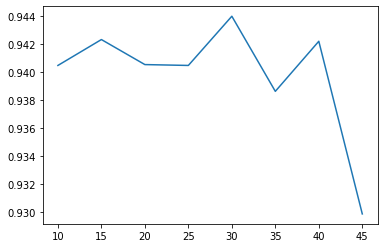

In [21]:
plt.plot(depth, [s.mean() for s in cv_scores_DT])

In [22]:
ks = list(range(10,100,10))

In [23]:
cv_scores_KNN = [cross_val_score(KNeighborsClassifier(n_neighbors=k), features[selected_features], target, cv=20)
                for k in ks]

In [24]:
cv_scores_KNN

[array([0.86206897, 0.93103448, 1.        , 0.72413793, 0.93103448,
        0.86206897, 0.93103448, 0.93103448, 0.93103448, 0.92857143,
        0.85714286, 0.92857143, 1.        , 0.92857143, 0.96428571,
        0.89285714, 0.92857143, 0.96428571, 0.92857143, 0.96428571]),
 array([0.86206897, 0.93103448, 0.96551724, 0.72413793, 0.89655172,
        0.86206897, 0.93103448, 0.93103448, 0.93103448, 0.92857143,
        0.85714286, 0.92857143, 1.        , 0.92857143, 1.        ,
        0.89285714, 0.89285714, 0.96428571, 0.92857143, 0.96428571]),
 array([0.86206897, 0.93103448, 1.        , 0.72413793, 0.93103448,
        0.86206897, 0.93103448, 0.93103448, 0.93103448, 0.92857143,
        0.85714286, 0.92857143, 1.        , 0.92857143, 1.        ,
        0.89285714, 0.92857143, 0.96428571, 0.92857143, 0.96428571]),
 array([0.82758621, 0.93103448, 0.93103448, 0.72413793, 0.89655172,
        0.86206897, 0.93103448, 0.93103448, 0.93103448, 0.92857143,
        0.85714286, 0.92857143, 1.        

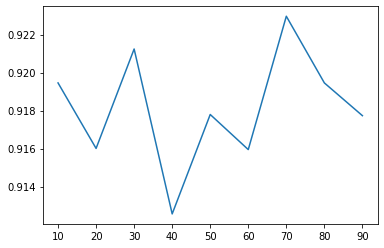

In [25]:
plt.plot(ks, [s.mean() for s in cv_scores_KNN])